In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from pathlib import Path

Creating a single dataframe for all the years and all the divisions for maternal deaths.

In [156]:
path_to_files =[ "../data/all_division_data/maternal_deaths/all_mat_death_by_division_by_year_1968_1978.txt" , 
                 "../data/all_division_data/maternal_deaths/all_mat_death_by_division_by_year_1979_1998.txt",
                  "../data/all_division_data/maternal_deaths/all_mat_death_by_division_by_year_1999_2020.txt"]
path_to_file_csv = "../data/all_division_data/maternal_deaths/mat_deaths_by_div_by_year_1968_2020.csv"

In [157]:
txt_line_to_csv_line = lambda x : x.replace("\t", ',')
write_file = open(path_to_file_csv, 'w')
file_num = 0
for file_name in path_to_files:
    f = open(file_name)
    line_number = -1
    for line in f:
        line_number+=1
        if line_number ==0 and file_num>0:
            continue
        if "---" in line:
            break
        if  not ("Total" in line):
            csv_line = txt_line_to_csv_line(line)
            write_file.write(csv_line)
        
    file_num+=1
mat_death_df = pd.read_csv(path_to_file_csv)
mat_death_df.Division = mat_death_df.Division.apply(lambda x: x[12:])
mat_death_df  = mat_death_df[['Division','Year','Deaths','Population']]
mat_death_df.head()


/var/folders/kx/_sczypq50kb21ppr_h5y831m0000gn/T/ipykernel_3191/2826435147.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='../data/all_division_data/birth_data/birth_by_div_by_year_by_year_2003_2023.csv' mode='w' encoding='UTF-8'>
  write_file = open(path_to_file_csv, 'w')
/var/folders/kx/_sczypq50kb21ppr_h5y831m0000gn/T/ipykernel_3191/2826435147.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='../data/all_division_data/maternal_deaths/all_mat_death_by_division_by_year_1968_1978.txt' mode='r' encoding='UTF-8'>
  f = open(file_name)
/var/folders/kx/_sczypq50kb21ppr_h5y831m0000gn/T/ipykernel_3191/2826435147.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='../data/all_division_data/maternal_deaths/all_mat_death_by_division_by_year_1979_1998.txt' mode='r' encoding='UTF-8'>
  f = open(file_name)


,Division,Year,Deaths,Population
0,New England,1968,26,11685721
1,New England,1969,19,11762197
2,New England,1970,15,11849320
3,New England,1971,24,11987980
4,New England,1972,16,12064441


In [158]:
mat_death_df.Deaths = mat_death_df.Deaths.apply(lambda x:np.nan if x == "Suppressed" else int(x))
mat_death_df.dtypes

Division       object
Year            int64
Deaths        float64
Population      int64
dtype: object

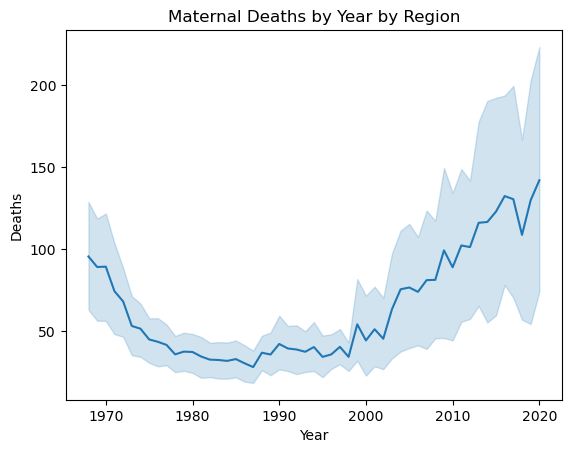

In [159]:
sns.lineplot(data = mat_death_df, x = 'Year', y = 'Deaths')
plt.title("Maternal Deaths by Year by Region")
plt.show()

Let's organize the natility information into a dataframe.

In [160]:
#path_to_files =[ "..\\data\\all_division_data\\birth_data\\births_by_div_by_year_by_education_1995_2002.txt" , 
#                 "..\\data\\all_division_data\\birth_data\\births_by_div_by_year_by_education_2003_2006.txt",
#                  "..\\data\\all_division_data\\birth_data\\births_by_div_by_year_by_education_2007_2023.txt"]
#path_to_file_csv = "..\\data\\all_division_data\\birth_data\\birth_by_div_by_year_by_education_2003_2023.csv"
path_to_files =[ "../data/all_division_data/birth_data/births_by_div_by_year_by_education_1995_2002.txt" , 
                 "../data/all_division_data/birth_data/births_by_div_by_year_by_education_2003_2006.txt",
                  "../data/all_division_data/birth_data/births_by_div_by_year_by_education_2007_2023.txt"]
path_to_file_csv = "../data/all_division_data/birth_data/birth_by_div_by_year_by_education_2003_2023.csv"

In [161]:
txt_line_to_csv_line = lambda x : x.replace("\t", ',')
write_file = open(path_to_file_csv, 'w')
file_num = 0
for file_name in path_to_files:
    f = open(file_name)
    line_number = -1
    for line in f:
        line_number+=1
        if line_number ==0 and file_num>0:
            continue
        if "---" in line:
            break
        if  not ("Total" in line):
            csv_line = txt_line_to_csv_line(line)
            write_file.write(csv_line)
        
    file_num+=1
del f
birth_info_df = pd.read_csv(path_to_file_csv)
birth_info_df["Division"] = birth_info_df["Census Division"].apply(lambda x: x[12:])
birth_info_df = birth_info_df[["Division", "Year", "Births", "Mother's Education"]]
birth_info_df.head()

/var/folders/kx/_sczypq50kb21ppr_h5y831m0000gn/T/ipykernel_3191/1471701773.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='../data/all_division_data/maternal_deaths/mat_deaths_by_div_by_year_1968_2020.csv' mode='w' encoding='UTF-8'>
  write_file = open(path_to_file_csv, 'w')
/var/folders/kx/_sczypq50kb21ppr_h5y831m0000gn/T/ipykernel_3191/1471701773.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='../data/all_division_data/maternal_deaths/all_mat_death_by_division_by_year_1999_2020.txt' mode='r' encoding='UTF-8'>
  f = open(file_name)
/var/folders/kx/_sczypq50kb21ppr_h5y831m0000gn/T/ipykernel_3191/1471701773.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='../data/all_division_data/birth_data/births_by_div_by_year_by_education_1995_2002.txt' mode='r' encoding='UTF-8'>
  f = open(file_name)
/var/folders/kx/_sczypq50kb21ppr_h5y831m0000gn/T/ipykernel_3191/1471701773.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='../data/all_division_da

,Division,Year,Births,Mother's Education
0,New England,1995,4424,0 - 8 years
1,New England,1995,16978,9 - 11 years
2,New England,1995,53019,12 years
3,New England,1995,40419,13 - 15 years
4,New England,1995,55558,16 years and over


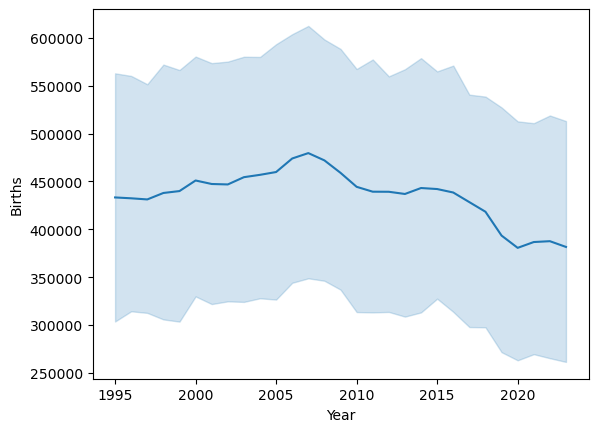

In [162]:
sns.lineplot(data = birth_info_df.groupby(["Division", "Year"]).Births.sum().reset_index(), x = "Year", y = "Births")
plt.show()

The "Mother's Educatoin" column has two distinctions based on when the data is collected. See [https://wonder.cdc.gov/wonder/help/natality.html#Education](https://wonder.cdc.gov/wonder/help/natality.html#Education).

I'll changed this to "No HS", "Some HS No Diploma", "HS/GED", "Some College", and "At least Bachelors"

In [163]:
def mother_education_change(str):
    if str in ['0 -  8 years',  '8th grade or less']:
        return "No HS"
    if str in [ '9 - 11 years', '9th through 12th grade with no diploma' ]:
        return "Some HS No Diploma"
    if str in ['12 years',  'High school graduate or GED completed']:
        return "HS/GED"
    if str in ['13 - 15 years', 'Some college credit, but not a degree', 'Associate degree (AA, AS)' ]:
        return "Some College"
    if str in ["Bachelor's degree (BA, AB, BS)", "Master's degree (MA, MS, MEng, MEd, MSW, MBA)",  'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)', '16 years and over' ]:
        return "At least Bachelors"
    if str in [ 'Not stated/Not on certificate',   'Unknown or Not Stated', 'Not Reported']:
        return "Unknown"
    else:
        return str
birth_info_df["Mother's Education"] = birth_info_df["Mother's Education"].apply(mother_education_change)


<Axes: xlabel='Year', ylabel='Births'>

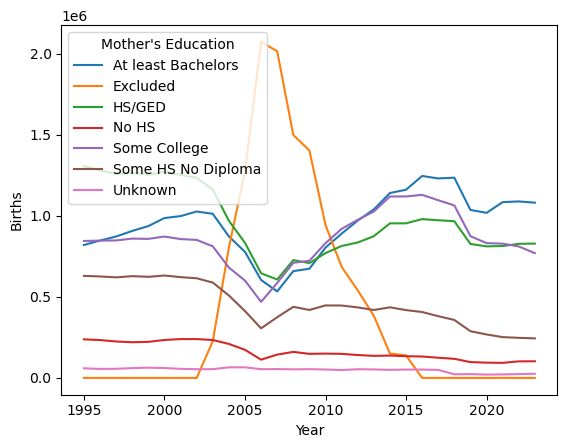

In [164]:
sns.lineplot(data = birth_info_df.groupby(["Year","Mother's Education"]).Births.sum().reset_index(), x = "Year", y = "Births", hue = "Mother's Education")

In [165]:
#path_to_files =[ "..\\data\\all_division_data\\birth_data\\births_by_div_by_year_by_age_1995_2002.txt" , 
#                 "..\\data\\all_division_data\\birth_data\\births_by_div_by_year_by_age_2003_2006.txt",
#                  "..\\data\\all_division_data\\birth_data\\births_by_div_by_year_by_age_2007_2023.txt"]
#path_to_file_csv = "..\\data\\all_division_data\\birth_data\\birth_by_div_by_year_by_year_2003_2023.csv"
path_to_files =[ "../data/all_division_data/birth_data/births_by_div_by_year_by_age_1995_2002.txt" , 
                 "../data/all_division_data/birth_data/births_by_div_by_year_by_age_2003_2006.txt",
                  "../data/all_division_data/birth_data/births_by_div_by_year_by_age_2007_2023.txt"]
path_to_file_csv = "../data/all_division_data/birth_data/birth_by_div_by_year_by_year_2003_2023.csv"

In [166]:
txt_line_to_csv_line = lambda x : x.replace("\t", ',')
write_file = open(path_to_file_csv, 'w')
file_num = 0
for file_name in path_to_files:
    f = open(file_name)
    line_number = -1
    for line in f:
        line_number+=1
        if line_number ==0 and file_num>0:
            continue
        if "---" in line:
            break
        if  not ("Total" in line):
            csv_line = txt_line_to_csv_line(line)
            write_file.write(csv_line)
        
    file_num+=1
del f
birth_info_age_df = pd.read_csv(path_to_file_csv)
birth_info_age_df["Division"] = birth_info_age_df["Census Division"].apply(lambda x: x[12:])
birth_info_age_df["Age"] = birth_info_age_df["Age of Mother Code"]
birth_info_age_df = birth_info_age_df[["Division", "Year", "Births", "Age"]]
birth_info_age_df.head()

/var/folders/kx/_sczypq50kb21ppr_h5y831m0000gn/T/ipykernel_3191/2279537372.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='../data/all_division_data/birth_data/birth_by_div_by_year_by_education_2003_2023.csv' mode='w' encoding='UTF-8'>
  write_file = open(path_to_file_csv, 'w')
/var/folders/kx/_sczypq50kb21ppr_h5y831m0000gn/T/ipykernel_3191/2279537372.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='../data/all_division_data/birth_data/births_by_div_by_year_by_age_1995_2002.txt' mode='r' encoding='UTF-8'>
  f = open(file_name)
/var/folders/kx/_sczypq50kb21ppr_h5y831m0000gn/T/ipykernel_3191/2279537372.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='../data/all_division_data/birth_data/births_by_div_by_year_by_age_2003_2006.txt' mode='r' encoding='UTF-8'>
  f = open(file_name)
/var/folders/kx/_sczypq50kb21ppr_h5y831m0000gn/T/ipykernel_3191/2279537372.py:18: ResourceWarning: unclosed file <_io.TextIOWrapper name='../data/all_division_data/birth_dat

,Division,Year,Births,Age
0,New England,1995,255,15
1,New England,1995,14046,15-19
2,New England,1995,30064,20-24
3,New England,1995,48498,25-29
4,New England,1995,53649,30-34


Some of the "50+" data is suppressed, so let's just set it to 0.

In [167]:
birth_info_age_df.Births = birth_info_age_df.Births.apply(lambda x: 0 if x=="Suppressed" else x).astype("int64")

<Axes: xlabel='Year', ylabel='Births'>

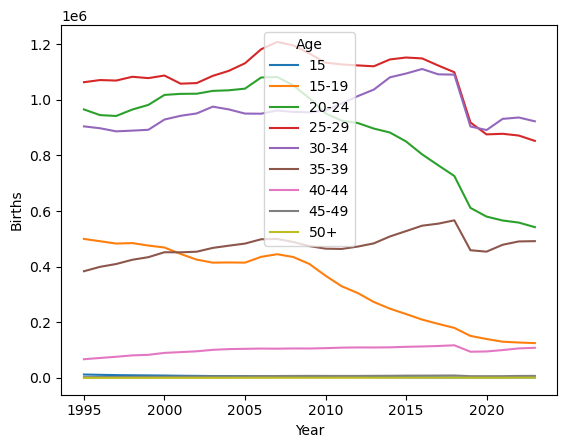

In [168]:
sns.lineplot(data = birth_info_age_df.groupby(["Year","Age"]).Births.sum().reset_index(), x= "Year", y = "Births", hue="Age")

Let's merge the birth and maternal death dataframes and see if we can see anything interesting.

In [169]:
merge_birth_death = pd.merge(left = mat_death_df, right = birth_info_age_df, on= ["Year","Division"], how = 'inner')
print(merge_birth_death.head())

      Division  Year  Deaths  Population  Births    Age
0  New England  1995     NaN    13472550     255     15
1  New England  1995     NaN    13472550   14046  15-19
2  New England  1995     NaN    13472550   30064  20-24
3  New England  1995     NaN    13472550   48498  25-29
4  New England  1995     NaN    13472550   53649  30-34


In [170]:
merge_birth_death=merge_birth_death.dropna()


In [171]:
merge_birth_death.head()

,Division,Year,Deaths,Population,Births,Age
36,Middle Atlantic,1995,47.0,38820471,1157,15
37,Middle Atlantic,1995,47.0,38820471,49956,15-19
38,Middle Atlantic,1995,47.0,38820471,104656,20-24
39,Middle Atlantic,1995,47.0,38820471,151096,25-29
40,Middle Atlantic,1995,47.0,38820471,151281,30-34


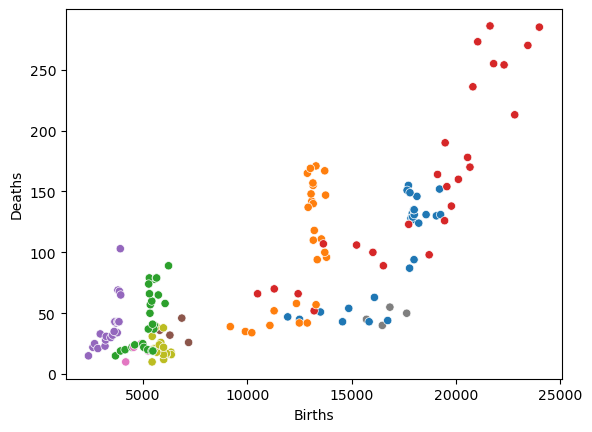

In [172]:
g = sns.scatterplot(data = merge_birth_death[merge_birth_death.Age == "40-44"], x = "Births", y = "Deaths", hue="Division")
g.get_legend().set_visible(False)
plt.show()

In [173]:
merge_birth_death.Age.unique()

array(['15', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44',
       '45-49', '50+'], dtype=object)

Let's look for other data. Health data.

In [174]:
all_years = [2010+j for j in range(14) if j!=10]
#base_path_name = "..\\data\\all_division_data\\health_insurance\\acs_health_insurance_by_div_by_sex_by_age_"
#warnings.filterwarnings("ignore")
base_path_name = "../data/all_division_data/health_insurance/acs_health_insurance_by_div_by_sex_by_age_"
warnings.filterwarnings("ignore")
for year in all_years:
    path_name = base_path_name+str(year)+".csv"
    temp_df = pd.read_csv(path_name)
    fem_df = temp_df.iloc[30:]
    fem_df["Label (Grouping)"] = [x.replace("\xa0","") for x in list(fem_df["Label (Grouping)"])]
    label_list = list(fem_df["Label (Grouping)"])
    new_label_list = [label_list[(j//3)*3]+" " +label_list[j] for j in range(len(label_list))]
    fem_df["Label (Grouping)"] = new_label_list
    fem_df.reset_index(inplace=True)
    fem_df = fem_df[fem_df.columns[1:]]
    fem_df = fem_df.iloc[[j for j in range(fem_df.shape[0]) if (j%3)!=0]]
    fem_df = fem_df.rename(columns={x: x.replace(" Division!!Estimate","") for x in fem_df.columns})
    fem_df = fem_df.transpose()
    fem_df = fem_df.rename(columns = {j:x for (j,x) in zip(fem_df.columns, fem_df.iloc[0][:])})
    fem_df = fem_df.iloc[1:]
    fem_df["Year"] = [year for _ in range(fem_df.shape[0])]
    if year == 2010:
        total_fem_df = fem_df
    else:
        total_fem_df = pd.concat([total_fem_df, fem_df])
warnings.filterwarnings("always")


Unfortunately, it looks like some of the age classifications have been inconsistent.

In [175]:
total_fem_df[total_fem_df.index=="Pacific"]

,Under 6 years: With health insurance coverage,Under 6 years: No health insurance coverage,6 to 17 years: With health insurance coverage,6 to 17 years: No health insurance coverage,18 to 24 years: With health insurance coverage,18 to 24 years: No health insurance coverage,25 to 34 years: With health insurance coverage,25 to 34 years: No health insurance coverage,35 to 44 years: With health insurance coverage,35 to 44 years: No health insurance coverage,...,65 to 74 years: No health insurance coverage,75 years and over: With health insurance coverage,75 years and over: No health insurance coverage,Year,6 to 18 years: With health insurance coverage,6 to 18 years: No health insurance coverage,19 to 25 years: With health insurance coverage,19 to 25 years: No health insurance coverage,26 to 34 years: With health insurance coverage,26 to 34 years: No health insurance coverage
Pacific,"1,837,486","120,416","3,616,639","392,931","1,748,672","712,781","2,589,018","851,091","2,703,641","691,512",...,"33,582","1,530,580","14,682",2010,NaN,NaN,NaN,NaN,NaN,NaN
Pacific,"1,853,690","111,215","3,643,562","344,307","1,833,933","656,800","2,604,982","880,928","2,682,924","708,071",...,"36,728","1,558,830","13,901",2011,NaN,NaN,NaN,NaN,NaN,NaN
Pacific,"1,854,471","113,089","3,636,065","332,866","1,893,906","625,165","2,648,191","875,082","2,688,388","706,888",...,"38,315","1,584,148","15,155",2012,NaN,NaN,NaN,NaN,NaN,NaN
Pacific,"1,845,772","104,522","3,645,780","317,138","1,909,170","605,629","2,737,978","848,417","2,690,317","704,810",...,"42,685","1,607,843","13,451",2013,NaN,NaN,NaN,NaN,NaN,NaN
Pacific,"1,871,219","79,166","3,738,668","231,208","2,106,372","406,378","3,051,143","626,377","2,904,749","514,579",...,"38,548","1,647,556","13,759",2014,NaN,NaN,NaN,NaN,NaN,NaN
Pacific,"1,884,917","51,335","3,827,255","147,876","2,216,247","264,470","3,317,769","435,484","3,056,480","367,976",...,"30,111","1,685,117","10,619",2015,NaN,NaN,NaN,NaN,NaN,NaN
Pacific,"1,895,500","44,131","3,829,401","134,560","2,227,657","208,642","3,444,264","364,451","3,098,234","328,138",...,"28,545","1,724,177","11,372",2016,NaN,NaN,NaN,NaN,NaN,NaN
Pacific,"1,870,898","47,544",NaN,NaN,NaN,NaN,NaN,NaN,"3,149,852","328,502",...,"25,605","1,763,453","12,517",2017,"4,173,302","149,477","2,253,278","218,625","3,131,529","321,365"
Pacific,"1,846,156","45,541",NaN,NaN,NaN,NaN,NaN,NaN,"3,176,756","328,218",...,"26,479","1,823,180","10,077",2018,"4,180,632","150,824","2,189,080","227,816","3,169,405","335,567"
Pacific,"1,816,330","54,171",NaN,NaN,NaN,NaN,NaN,NaN,"3,198,543","339,610",...,"27,327","1,874,206","12,140",2019,"4,126,628","169,979","2,147,767","239,345","3,146,157","352,319"


We can just group these by "Under 6", "7-34" and "34+".

In [176]:
total_fem_df = total_fem_df.fillna("0")
nan_point = total_fem_df[total_fem_df.index=="Pacific"]["6 to 17 years: With health insurance coverage"].unique()[-1]
for col in total_fem_df.columns:
    if col != "Year":
        total_fem_df[col] = total_fem_df[col].apply(lambda x: x.replace(",",""))
        total_fem_df[col] = total_fem_df[col].astype(int)

In [177]:
total_fem_df.dtypes
total_fem_df["Under6_No_HI"] = total_fem_df["Under 6 years: No health insurance coverage"]
total_fem_df["6to34_No_HI"] = total_fem_df[["6 to 17 years: No health insurance coverage",
                                            "18 to 24 years: No health insurance coverage",
                                            "25 to 34 years: No health insurance coverage",
                                            "6 to 18 years: No health insurance coverage",
                                            "19 to 25 years: No health insurance coverage",
                                            "26 to 34 years: No health insurance coverage"]].sum(axis=1)
total_fem_df['35to54_No_HI'] = total_fem_df[[ '35 to 44 years: No health insurance coverage',
                                            '45 to 54 years: No health insurance coverage']].sum(axis=1)
total_fem_df['55plus_No_HI'] = total_fem_df[[ '55 to 64 years: No health insurance coverage',
                                            '65 to 74 years: No health insurance coverage',
                                            '75 years and over: No health insurance coverage']].sum(axis=1)
total_fem_df["Under6_With_HI"] = total_fem_df["Under 6 years: With health insurance coverage"]
total_fem_df["6to34_With_HI"] = total_fem_df[["6 to 17 years: With health insurance coverage",
                                            "18 to 24 years: With health insurance coverage",
                                            "25 to 34 years: With health insurance coverage",
                                            "6 to 18 years: With health insurance coverage",
                                            "19 to 25 years: With health insurance coverage",
                                            "26 to 34 years: With health insurance coverage"]].sum(axis=1)
total_fem_df['35to54_With_HI'] = total_fem_df[[ '35 to 44 years: With health insurance coverage',
                                            '45 to 54 years: With health insurance coverage']].sum(axis=1)
total_fem_df['55plus_With_HI'] = total_fem_df[[ '55 to 64 years: With health insurance coverage',
                                            '65 to 74 years: With health insurance coverage',
                                            '75 years and over: With health insurance coverage']].sum(axis=1)
new_column_set = list(total_fem_df.columns[-8:])
new_column_set.insert(0,"Year")
total_fem_df = total_fem_df[new_column_set]
total_fem_df.reset_index(inplace = True)
total_fem_HI_df = total_fem_df.rename(columns={"index":"Division"})


In [178]:

find_state = lambda str : str[:str.index("!")] if '!' in str else str
mystring_to_int = lambda str : int(str.replace(',',''))
mypercent_to_float = lambda str : float(str.replace('%',''))/100 if '%' in str else 0


def get_dataset_by_year(year):
     # grabs the data until the mean and median income
    #df = pd.read_csv(f'..\\data\\all_division_data\\income\\acs_income_by_div_{year}.csv')
    df = pd.read_csv(f'../data/all_division_data/income/acs_income_by_div_{year}.csv')
    df = df.iloc[:11]
    #find all the states
    USstates = {find_state(col) for col in df.columns[1:]}
    USstates = list(USstates)
    USstates.sort()
    #prepare new dataframe and keep the income braket labels
    df2 = pd.DataFrame()
    df2['label'] = [str.replace(u'\xa0','') for str in df['Label (Grouping)']]
    # construct dataframe grouped by state
    for us_state in USstates:
        get_columns_for_state = [x for x in df.columns if find_state(x) == us_state]
        state_list = []
        counts = [mystring_to_int(x) for x in df.iloc[0][get_columns_for_state]]
        state_list.append(sum(counts))
        row_ind = 0
        for row in np.array(df.iloc[1:][get_columns_for_state]): 
            row_ind+=1
            new_row_sum = 0
            for ind in range(len(get_columns_for_state)):
                new_row_sum+=int(mypercent_to_float(row[ind])*counts[ind])
            state_list.append(new_row_sum)
        df2[us_state] = state_list
    df2 = df2.transpose()
    df2 = df2.rename(columns={j:x for (j,x) in zip(range(11), df2.iloc[0][:])})
    df2 = df2[df2.Total!="Total"]
    df2['Year'] = [year for _ in range(df2.shape[0])]
    reindex_cols = ["Year"]
    reindex_cols.extend([x for x in df2.columns[1:-1]])
    reindex_cols.append("Total")
    df2 = df2[reindex_cols]
    df2 = df2.reset_index()
    df2 = df2.rename(columns = {"index":"Division"})
    df2.Division = df2.Division.apply(lambda x:x.replace(" Division",""))
    return df2

YEARS = [2010 +j for j in range(14) if j !=10]
df_list = [get_dataset_by_year(year) for year in YEARS]
total_df = pd.concat(df_list)
total_df.sort_values(["Division","Year"])
income_data_df = total_df

In [179]:
from functools import reduce

data_frames = [mat_death_df, birth_info_age_df, total_fem_HI_df, income_data_df]
mega_df = reduce(lambda  left,right: pd.merge(left,right,on=["Division", "Year"],
                                            how='inner'), data_frames)

In [180]:
birth_info_pivoted = pd.pivot_table(data = birth_info_age_df, columns = 'Age', values = "Births" , index = ["Year", "Division"])
birth_info_pivoted.rename(columns= {x:"Births_"+x for x in birth_info_pivoted.columns},inplace=True)
birth_info_pivoted.head()

Age                      Births_15  Births_15-19  Births_20-24  Births_25-29  \
Year Division                                                                  
1995 East North Central     1810.0       79430.0      153764.0      176090.0   
     East South Central     1118.0       40642.0       69645.0       58126.0   
     Middle Atlantic        1157.0       49956.0      104656.0      151096.0   
     Mountain                668.0       34447.0       70362.0       68726.0   
     New England             255.0       14046.0       30064.0       48498.0   

Age                      Births_30-34  Births_35-39  Births_40-44  \
Year Division                                                       
1995 East North Central      146245.0       57987.0        9179.0   
     East South Central       40350.0       14891.0        2375.0   
     Middle Atlantic         151281.0       67477.0       11932.0   
     Mountain                 52499.0       22739.0        4162.0   
     New England              53649.0       23500.0        3939.0   

Age                      Births_45-49  Births_50+  
Year Division                                      
1995 East North Central         327.0         0.0  
     East South Central          76.0         0.0  
     Middle Atlantic            492.0         0.0  
     Mountain                   183.0         0.0  
     New England                151.0         0.0

In [181]:
mat_death_df.set_index(['Year', "Division"], inplace=True)
mat_death_df.sort_values("Year",inplace=True)
mat_death_df.head()

Deaths  Population
Year Division                              
1968 New England           26.0    11685721
     South Atlantic       162.0    29619100
     East South Central    90.0    12516124
     West South Central   113.0    18785282
     Mountain              46.0     7858383

In [182]:
mat_death_df.rename(columns = {"Deaths":"Maternal_Deaths"},inplace=True)
mat_death_df.head()

Maternal_Deaths  Population
Year Division                                       
1968 New England                    26.0    11685721
     South Atlantic                162.0    29619100
     East South Central             90.0    12516124
     West South Central            113.0    18785282
     Mountain                       46.0     7858383

In [183]:
total_fem_HI_df.set_index(["Year","Division"],inplace= True)
total_fem_HI_df.head()

Under6_No_HI  6to34_No_HI  35to54_No_HI  \
Year Division                                                      
2010 New England                10714       204138        157794   
     Middle Atlantic            65829      1009703        713065   
     East North Central         82357      1229302        927456   
     West North Central         40361       539187        343501   
     South Atlantic            153717      2305919       1720835   

                         55plus_No_HI  Under6_With_HI  6to34_With_HI  \
Year Division                                                          
2010 New England                62738          459646        2452284   
     Middle Atlantic           266045         1360206        6655137   
     East North Central        346429         1651921        7609527   
     West North Central        117711          774445        3373224   
     South Atlantic            620075         2052291        8911107   

                         35to54_With_HI  55plus_With_HI  
Year Division                                            
2010 New England                2001137         2006331  
     Middle Atlantic            5214097         5555985  
     East North Central         5595580         5972628  
     West North Central         2429982         2639304  
     South Atlantic             6848107         7785789

In [184]:
income_data_df.set_index(["Year","Division"],inplace=True)
income_data_df.head()

Less than $10,000 $10,000 to $14,999  \
Year Division                                                  
2010 East North Central           2973270            2218450   
     East South Central           1560886            1199241   
     Middle Atlantic              2441820            1753337   
     Mountain                     1319348             995364   
     New England                   807381             619787   

                        $15,000 to $24,999 $25,000 to $34,999  \
Year Division                                                   
2010 East North Central            4866509            4759361   
     East South Central            2244822            2039977   
     Middle Atlantic               3611768            3457342   
     Mountain                      2141464            2189131   
     New England                   1186037            1141830   

                        $35,000 to $49,999 $50,000 to $74,999  \
Year Division                                                   
2010 East North Central            6557172            8672040   
     East South Central            2653908            3205078   
     Middle Atlantic               4752710            6757527   
     Mountain                      2997800            4007483   
     New England                   1673035            2466229   

                        $75,000 to $99,999 $100,000 to $149,999  \
Year Division                                                     
2010 East North Central            5746725              5398592   
     East South Central            1944399              1681451   
     Middle Atlantic               4812457              5550671   
     Mountain                      2618569              2583459   
     New England                   1896846              2233609   

                        $150,000 to $199,999 $200,000 or more     Total  
Year Division                                                            
2010 East North Central              1680099          1462947  44346900  
     East South Central               497620           434903  17440119  
     Middle Atlantic                 2299147          2358581  37815975  
     Mountain                         807353           704252  20347981  
     New England                      917003           918922  13861810

In [185]:
data_frames = [mat_death_df, birth_info_pivoted, total_fem_HI_df, income_data_df]
mega_df = reduce(lambda  left,right: pd.merge(left,right,on = ["Year","Division"],
                                            how='inner'), data_frames)
mega_df.head(30)

Maternal_Deaths  Population  Births_15  Births_15-19  \
Year Division                                                                   
2010 South Atlantic                160.0    59777037      907.0       69966.0   
     New England                    16.0    14444865       77.0        9114.0   
     East North Central            142.0    46421564      621.0       53150.0   
     West North Central             41.0    20505437      224.0       22178.0   
     Middle Atlantic               131.0    40872375      414.0       32878.0   
     East South Central             43.0    18432505      408.0       29358.0   
2011 East North Central            171.0    46519084      521.0       47443.0   
     West North Central             60.0    20639751      213.0       19908.0   
     Middle Atlantic               135.0    41029238      391.0       29892.0   
     East South Central             43.0    18553961      351.0       26580.0   
     South Atlantic                178.0    60513771      796.0       62773.0   
     New England                    26.0    14492360       69.0        8200.0   
2012 West North Central             78.0    20749725      204.0       18619.0   
     East North Central            148.0    46566572      494.0       43977.0   
     Middle Atlantic               124.0    41198387      377.0       27413.0   
     East South Central             69.0    18643607      328.0       24575.0   
     South Atlantic                170.0    61188567      745.0       57375.0   
     New England                    18.0    14562704       73.0        7657.0   
2013 West North Central             79.0    20885710      146.0       16849.0   
     South Atlantic                236.0    61783647      621.0       50600.0   
     New England                    18.0    14618806       69.0        6573.0   
     East North Central            140.0    46662180      424.0       39183.0   
     East South Central             68.0    18716202      272.0       22254.0   
     Middle Atlantic               155.0    41324267      266.0       23973.0   
2014 West North Central             74.0    21006069      153.0       15352.0   
     New England                    21.0    14680722       47.0        5860.0   
     East South Central             43.0    18806265      257.0       20495.0   
     South Atlantic                273.0    62514615      555.0       46445.0   
     East North Central            137.0    46739039      378.0       35632.0   
     Middle Atlantic               151.0    41471611      248.0       21524.0   

                         Births_20-24  Births_25-29  Births_30-34  \
Year Division                                                       
2010 South Atlantic          185533.0      207848.0      174689.0   
     New England              27318.0       39887.0       46182.0   
     East North Central      135189.0      167354.0      140354.0   
     West North Central       64855.0       87464.0       65243.0   
     Middle Atlantic          97755.0      133078.0      137934.0   
     East South Central       69919.0       68091.0       45206.0   
2011 East North Central      132166.0      166723.0      143169.0   
     West North Central       62580.0       86928.0       68226.0   
     Middle Atlantic          95105.0      133384.0      139610.0   
     East South Central       69640.0       68241.0       47018.0   
     South Atlantic          181217.0      207150.0      179856.0   
     New England              26759.0       40306.0       47244.0   
2012 West North Central       62490.0       86737.0       70934.0   
     East North Central      131903.0      165166.0      145253.0   
     Middle Atlantic          93576.0      131604.0      141799.0   
     East South Central       69393.0       67988.0       48412.0   
     South Atlantic          178545.0      207071.0      184207.0   
     New England              25898.0       39674.0       47378.0   
2013 West North Central       60722.0       87009.0 

In [186]:
mega_df.columns

Index(['Maternal_Deaths', 'Population', 'Births_15', 'Births_15-19',
       'Births_20-24', 'Births_25-29', 'Births_30-34', 'Births_35-39',
       'Births_40-44', 'Births_45-49', 'Births_50+', 'Under6_No_HI',
       '6to34_No_HI', '35to54_No_HI', '55plus_No_HI', 'Under6_With_HI',
       '6to34_With_HI', '35to54_With_HI', '55plus_With_HI',
       'Less than $10,000', '$10,000 to $14,999', '$15,000 to $24,999',
       '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999',
       '$75,000 to $99,999', '$100,000 to $149,999', '$150,000 to $199,999',
       '$200,000 or more', 'Total'],
      dtype='object')

In [187]:
mega_df['Total_Births'] = mega_df['Births_15'] + mega_df['Births_15-19'] + mega_df['Births_20-24'] + mega_df['Births_25-29'] + mega_df['Births_30-34'] + mega_df['Births_35-39'] + mega_df['Births_40-44'] + mega_df['Births_45-49'] + mega_df['Births_50+']

mega_df['Total_Births']

Year  Division          
2010  South Atlantic        747031.0
      New England           153817.0
      East North Central    571286.0
      West North Central    271570.0
      Middle Atlantic       494618.0
      East South Central    235365.0
2011  East North Central    564749.0
      West North Central    269475.0
      Middle Atlantic       490373.0
      East South Central    234172.0
      South Atlantic        740619.0
      New England           153040.0
2012  West North Central    271413.0
      East North Central    561256.0
      Middle Atlantic       487660.0
      East South Central    233246.0
      South Atlantic        737559.0
      New England           151063.0
2013  West North Central    271330.0
      South Atlantic        734996.0
      New England           149829.0
      East North Central    559107.0
      East South Central    232479.0
      Middle Atlantic       480476.0
2014  West North Central    274610.0
      New England           150146.0
      East So

In [194]:
mega_df['MMR'] = mega_df['Maternal_Deaths']/mega_df['Total_Births']
# MMR = (number of maternal deaths/number of live births) * 100,000
mega_df['MMR'] = mega_df['MMR'] * 100000
mega_df['MMR'] 

Year  Division          
2010  South Atlantic        21.418121
      New England           10.401971
      East North Central    24.856202
      West North Central    15.097397
      Middle Atlantic       26.485085
      East South Central    18.269496
2011  East North Central    30.278938
      West North Central    22.265516
      Middle Atlantic       27.530064
      East South Central    18.362571
      South Atlantic        24.033950
      New England           16.989022
2012  West North Central    28.738491
      East North Central    26.369429
      Middle Atlantic       25.427552
      East South Central    29.582501
      South Atlantic        23.049004
      New England           11.915558
2013  West North Central    29.115837
      South Atlantic        32.109018
      New England           12.013696
      East North Central    25.039930
      East South Central    29.249954
      Middle Atlantic       32.259676
2014  West North Central    26.947307
      New England        

In [198]:
mega_df.columns

Index(['Maternal_Deaths', 'Population', 'Births_15', 'Births_15-19',
       'Births_20-24', 'Births_25-29', 'Births_30-34', 'Births_35-39',
       'Births_40-44', 'Births_45-49', 'Births_50+', 'Under6_No_HI',
       '6to34_No_HI', '35to54_No_HI', '55plus_No_HI', 'Under6_With_HI',
       '6to34_With_HI', '35to54_With_HI', '55plus_With_HI',
       'Less than $10,000', '$10,000 to $14,999', '$15,000 to $24,999',
       '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999',
       '$75,000 to $99,999', '$100,000 to $149,999', '$150,000 to $199,999',
       '$200,000 or more', 'Total', 'Total_Births', 'MMR'],
      dtype='object')